In [1]:
import os, sys, glob, re, pathlib
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

# Import utility functions and classes
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import MoCapAnnotations

# ggplot style
plt.style.use('ggplot')

In [2]:
fields = ['Rx', 'Ry', 'Rz']

In [3]:
csvs = glob.glob('../annotations/*/eaf.csv/*.eaf.csv')
anns = [MoCapAnnotations(csv, fields, False) for csv in csvs if all(skip not in csv for skip in ['sophie_04_e', 'sophie_05_i'])]
param_df = pd.concat(ann.params.as_df() for ann in anns)
ann_df = pd.concat(ann.as_df() for ann in anns).reset_index(drop=True)

In [4]:
gestures_map = {
    'nd': 'nod',
    'mnd': 'multiple nods',
    'fu': 'face-up',
    'fd': 'face-down',
    'sh': 'shake',
    't': 'turn',
    'ti': 'tilt'
}

gestures = list(gestures_map.keys())

In [5]:
def plot_gesture(g):
    fig, axs = plt.subplots(3, 1, figsize=(6, 3.5), sharex=True)
    
    g_ann_df = ann_df[ann_df['gesture'] == g]
    start, end, _, recording, _ = g_ann_df.iloc[0]

    # Padding for the plot
    padding = 50

    # Restrict the rotation vector dataframe to the correct time range (with padding)
    padded_df = param_df[param_df['recording'] == recording].iloc[(start-padding):(end+padding)][fields]

    # Calculate Y axis scale
    scale = max((abs(padded_df.values.min()), abs(padded_df.values.max())))
    
    colors = ['#eb6963', '#70bacf', '#30a67f']
    names = ['x', 'y', 'z']

    for i, r in enumerate(fields):
        # Select the column for the rotation vector and select the time of the gesture
        rov = padded_df[[r]]

        # Plot the rotation vector time series
        ax = axs.flat[i]
        rov.plot(color=colors[i], ax=ax)

        ax.set_xlabel('time frame')

        if r == 'Ry': # Only show y label on the middle subplot
            ax.set_ylabel('rotation ($\\varphi$)', rotation=90, labelpad=5)
        
        # Set axis scale
        ax.set(xlim=(start-padding, end+padding), ylim=(-scale-0.06, scale+0.06))

        # Draw gesture separators
        ax.axvline(x=start, color='black', linestyle='dashed', lw=1)
        ax.axvline(x=end, color='black', linestyle='dashed', lw=1)

        # Set legend labels
        ax.legend([names[i]], loc='center right', facecolor='white')
        
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.03)
    plt.savefig('plots/gesture-{}.pdf'.format(g))
    plt.show()

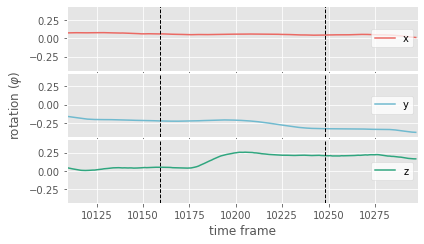

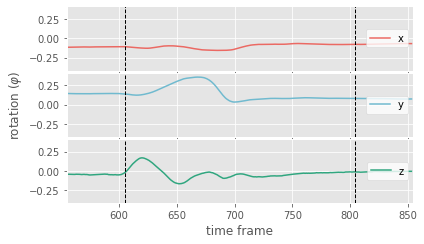

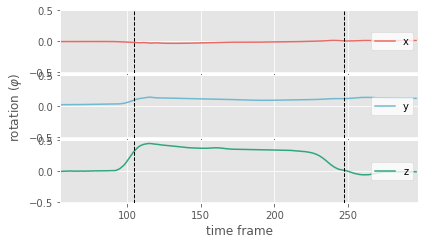

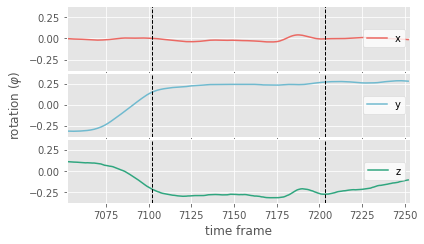

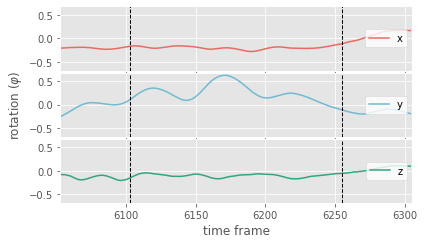

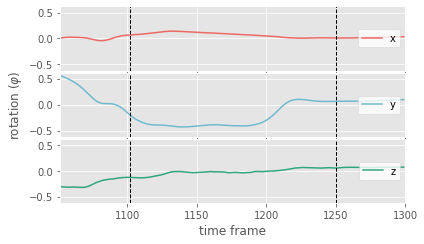

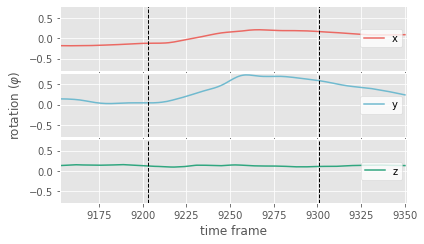

In [6]:
for g in gestures:
    plot_gesture(g)